### Course: Bayesian Filtering and Smoothing.
### Exercise round: 3
### Student's name: Diego Alejandro Agudelo España.

### Exercise 1 (Kalman Filter with Non-Zero Mean Noises).

Derive the Kalman filter equations for the following linear-Gaussian filtering model with non-zero-mean noises:

$$
\begin{align}
	\mathbf{x}_k &= \mathbf{A} \mathbf{x}_{k-1} + \mathbf{q}_{k-1},\\
	\mathbf{y}_k &= \mathbf{H} \mathbf{x}_k + \mathbf{r}_k,
\end{align}
$$

where $\mathbf{q}_{k-1} \sim \mathcal{N}(\mathbf{m}_q, \mathbf{Q})$ and $\mathbf{r}_k \sim \mathcal{N}(\mathbf{m}_r,\mathbf{R})$.

### Solution Exercise 1.

We can define probabilistically the dynamics and measurement model as follows:

$$ p(\mathbf{x}_k | \mathbf{x}_{k-1}) = \mathcal{N}(\mathbf{x}_k | \mathbf{A} \mathbf{x}_{k-1} + \mathbf{m}_q, \mathbf{Q})$$

$$ p(\mathbf{y}_k | \mathbf{x}_{k}) = \mathcal{N}(\mathbf{y}_k | \mathbf{H} \mathbf{x}_{k} + \mathbf{m}_r, \mathbf{R})$$

We can also assume that the posterior filtering distribution of the previous time step is given by:

$$ p(\mathbf{x}_{k-1} | \mathbf{y}_{1:k-1}) =  \mathcal{N}( \mathbf{x}_{k-1} | \mathbf{m}_{k-1}, \mathbf{P}_{k-1}) $$

Now we start deriving the Kalman filter equations with the prediction step and the *Chapman-Kolmogorov* equation.

$$ 
\begin{align}
p(\mathbf{x}_{k} | \mathbf{y}_{1:k - 1}) & = \int p(\mathbf{x}_k | \mathbf{x}_{k-1}) p(\mathbf{x}_{k-1} | \mathbf{y}_{1:k-1}) d\mathbf{x}_{k-1} \\
& = \int \mathcal{N}(\mathbf{x}_k | \mathbf{A} \mathbf{x}_{k-1} + \mathbf{m}_q, \mathbf{Q}) \mathcal{N}( \mathbf{x}_{k-1} | \mathbf{m}_{k-1}, \mathbf{P}_{k-1}) d\mathbf{x}_{k-1} \\
\end{align}
$$

In order to continue with the derivation is useful to recall the following property for marginal and conditional Gaussians distributions. Let $x$ and $y$ have the following Gaussian distributions:

$$ p(\mathbf{x}) =  \mathcal{N}(\mathbf{x} | \mathbf{m}, \mathbf{P})$$

$$ p(\mathbf{y} | \mathbf{x}) =  \mathcal{N}(\mathbf{y} | A \mathbf{x} + b, \mathbf{Q})$$

Then it holds that the marginal distribution $p(y)$ is algo Gaussian distributed. Especifically,

$$ p(\mathbf{y}) =  \mathcal{N}(\mathbf{y} | A \mathbf{m} + b, \mathbf{Q} + \mathbf{A} \mathbf{P} \mathbf{A}^\top) $$

Moreover the joint distribution of $\mathbf{x}$ and $\mathbf{y}$ is given by:

$$
\begin{pmatrix}
\mathbf{x} \\
\mathbf{y} \\
\end{pmatrix}
\sim
\mathcal{N}
\bigg(
\begin{pmatrix}
\mathbf{m} \\
A \mathbf{m} + b \\
\end{pmatrix}
,
\begin{pmatrix}
\mathbf{P} &  \mathbf{P} \mathbf{A}^\top \\
 \mathbf{A} \mathbf{P}^\top & \mathbf{Q} + \mathbf{A} \mathbf{P} \mathbf{A}^\top \\
\end{pmatrix}
\bigg)
$$

Applying the marginal property over the derivation of $p(\mathbf{x}_{k} | \mathbf{y}_{1:k - 1})$ we get:

$$ p(\mathbf{x}_{k} | \mathbf{y}_{1:k - 1}) = \mathcal{N}( \mathbf{x}_k |\mathbf{m}_k^{-}, \mathbf{P}_k^{-})$$

with

$$ 
\mathbf{m}_k^{-} = A \mathbf{m}_{k-1} + \mathbf{m}_{q}
$$
$$
\mathbf{P}_k^{-} = \mathbf{Q} + \mathbf{A} \mathbf{P}_{k-1} \mathbf{A}^\top
$$

This concludes the derivation of the prediction step. The update step is also necessary to get the Kalman filter equations and it requires to derive the joint distribution between $\mathbf{x}_k$ and $\mathbf{y}_k$. By means of the aforementioned property of Gaussians distributed random variables we can similarly derive this joint distribution.

$$ 
\begin{align}
p(\mathbf{x}_{k}, \mathbf{y}_{k} | \mathbf{y}_{1:k - 1}) & = p(\mathbf{y}_k | \mathbf{x}_{k}) p(\mathbf{x}_{k} | \mathbf{y}_{1:k-1}) \\
& = \mathcal{N}(\mathbf{y}_k | \mathbf{H} \mathbf{x}_{k} + \mathbf{m}_r, \mathbf{R})  \mathcal{N}( \mathbf{x}_k |\mathbf{m}_k^{-}, \mathbf{P}_k^{-})
\end{align}
$$

Therefore this joint distribution can be expressed as follows:

$$
\begin{pmatrix}
\mathbf{x}_k \\
\mathbf{y}_k \\
\end{pmatrix}
\sim
\mathcal{N}
\bigg(
\begin{pmatrix}
\mathbf{m}_k^{-} \\
\mathbf{H} \mathbf{m}_k^{-} + \mathbf{m}_r \\
\end{pmatrix}
,
\begin{pmatrix}
\mathbf{P}_k^{-} &  \mathbf{P}_{k}^{-} \mathbf{H}^\top \\
  \mathbf{H} \mathbf{P}_{k}^{-}  & \mathbf{R} + \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top \\
\end{pmatrix}
\bigg)
$$

Once the joint distribution is derived we can condition on $\mathbf{y}_{k}$ and then find the sought posterior over $\mathbf{x}_{k}$. This is done by using the properties of conditioned multivariate Gaussians.

$$
p(\mathbf{x}_{k} | \mathbf{y}_{1:k}) = \mathcal{N}(\mathbf{x}_{k} | \mathbf{m}_k, \mathbf{P}_k)
$$

where

$$
\mathbf{m}_k = \mathbf{m}_k^{-} + \mathbf{P}_{k}^{-} \mathbf{H}^\top (\mathbf{R} + \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top)^{-1} (\mathbf{y}_k - (\mathbf{H} \mathbf{m}_k^{-} + \mathbf{m}_r))
$$
$$
\mathbf{P}_k = \mathbf{P}_k^{-} - \mathbf{P}_{k}^{-} \mathbf{H}^\top (\mathbf{R} + \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top)^{-1}  \mathbf{H} \mathbf{P}_{k}^{-}
$$

Or equivalently in the Kalman filter traditional notation:

$$
\begin{align}
    \mathbf{S}_k & = \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top + \mathbf{R} \\
    \mathbf{K}_k & = \mathbf{P}_{k}^{-} \mathbf{H}^\top \mathbf{S}_k^{-1}\\
    \mathbf{m}_k & = \mathbf{m}_k^{-} + \mathbf{K}_k (\mathbf{y}_k - (\mathbf{H} \mathbf{m}_k^{-} + \mathbf{m}_r)) \\
    \mathbf{P}_k & = \mathbf{P}_k^{-} - \mathbf{K}_{k} \mathbf{S}_k \mathbf{K}_{k}^\top
\end{align}
$$

### Exercise 3. (Kalman Filter for Noisy Resonator)


$$
\begin{align}
	\mathbf{x} &= \begin{bmatrix} \cos(\omega) & \frac{\sin(\omega)}{\omega} \\ -\omega \sin(\omega) & \cos(\omega) \end{bmatrix} \mathbf{x}_{k-1} + \mathbf{q}_{k-1}\\
\end{align}
$$

$$
y_k = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}_k + r_k
$$

where $\mathbf{x}_k \in \mathbb{R}^2$ is the state, $y_k$ is the measurement, $r_k \sim \mathcal{N}(0, 0.1)$ is a white Gaussian measurement noise, and $\mathbf{q}_k \sim \mathcal{N}(\mathbf{0}, \mathbf{Q})$, where


\begin{align}
	\mathbf{Q} = \begin{bmatrix} \frac{q^c \omega - q^c \cos(\omega) \sin(\omega)}{2 \omega^3} & \frac{q^c \sin^2(\omega) }{2 \omega^2} \\ \frac{q^c \sin^2(\omega) }{2 \omega^2} & \frac{q^c \omega + q^c \cos(\omega) \sin(\omega)}{2 \omega} \end{bmatrix}.
\end{align}


The angular velocity is $\omega = 1/2$ and the spectral density is $q^c = 0.01$. The model is a discretized version of noisy resonator model with a given angular velocity $\omega$.

In the file ```kf_ex.m``` (in Noppa) there is a simulation of the dynamic model together with a baseline solution, where the measurement is directly used as the estimate of the state component $x_1$ and the second component $x_2$ is computed as a weighted average of the measurement differences.

1. Implement the Kalman filter for the model and compare its performance (in RMSE sense) to the baseline solution. Plot figures of the solutions.
2. Compute (numerically) the stationary Kalman filter corresponding to the model. Test this stationary filter against the baseline and Kalman filter solutions. Plot the results and report the RMSE values for the solutions. What is the practical difference in the stationary and non-stationary Kalman filter solutions?

### Solution Exercise 3.

### 1.

In [21]:
%%script octave
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% Becs-114.4610 - Special Course in Bayesian Modelling L:
% Bayesian Estimation of Time-Varying Processes (5 cr)
%
% This software is distributed under the GNU General Public 
% Licence (version 2 or later); please refer to the file 
% Licence.txt, included with the software, for details.
%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%% Generate data

  % Lock random seed
  randn('state',12);
  
  % rmse function
  rmse = @(AA,BB) sum(sum((AA - BB) .* (AA - BB)));

  % Substitute Simo's 'gauss_rnd', where m is the mean and S the covariance
  gauss_rnd = @(m,S) m + chol(S)' * randn(size(m));
  
  % Define parameters
  steps = 100;  % Number of time steps
  w     = 0.5;  % Angular velocity
  q     = 0.01; % Process noise spectral density
  r     = 0.1;  % Measurement noise variance

  % This is the transition matrix
  A = [cos(w)    sin(w)/w; 
       -w*sin(w) cos(w)];

  % This is the process noise covariance
  Q = [0.5*q*(w-cos(w)*sin(w))/w^3 0.5*q*sin(w)^2/w^2;
       0.5*q*sin(w)^2/w^2          0.5*q*(w+cos(w)*sin(w))/w];

  % This is the true initial value
  x0 = [0;0.1]; 

  % Simulate data
  X = zeros(2,steps);  % The true signal
  Y = zeros(1,steps);  % Measurements
  T = 1:steps;         % Time
  x = x0;
  for k=1:steps
    x = gauss_rnd(A*x,Q);
    y = gauss_rnd(x(1),r);
    X(:,k) = x;
    Y(:,k) = y;
  end

  % Visualize
  figure; clf;
    plot(T,X(1,:),'--',T,Y,'o');
    legend('True signal','Measurements');
    xlabel('Time step'); title('\bf Simulated data')
  saveas(gcf,'R2_SimulationData.png')
    
  % Report and pause
  fprintf('This is the simulated data. Press enter.\n');
  pause;

  
%% Baseline solution

  % Baseline solution. The estimates
  % of x_k are stored as columns of
  % the matrix EST1.
  
  % Calculate baseline estimate
  m1 = [0;1];  % Initialize first step with a guess
  EST1 = zeros(2,steps);
  for k=1:steps
    m1(2) = Y(k)-m1(1);
    m1(1) = Y(k);
    EST1(:,k) = m1;
  end

  % Visualize results
  figure; clf;
  
  % Plot the signal and its estimate
  subplot(2,1,1);
    plot(T,X(1,:),'--',T,EST1(1,:),'-',T,Y,'o');
    legend('True signal','Estimated signal','Measurements');
    xlabel('Time step'); title('\bf Baseline solution')
  
  % Plot the derivative and its estimate
  subplot(2,1,2);
    plot(T,X(2,:),'--',T,EST1(2,:),'-');
    legend('True derivative','Estimated derivative');
    xlabel('Time step')
  saveas(gcf,'R2_BaseLine.png')
    
  % Compute error
  err1 = rmse(X,EST1)
  
  % Report and pause
  fprintf('This is the base line estimate. Press enter.\n');
  pause
  
  
%% Kalman filter
  
  % Kalman filter solution. The estimates
  % of x_k are stored as columns of
  % the matrix EST2.

  m2 = [0;1];  % Initialize first step
  P2 = eye(2); % Some uncertanty in covariance  
  EST2 = zeros(2,steps); % Allocate space for results
  H = [1, 0];

  % Run Kalman filter
  for k=1:steps
    % Prediction step
    m2 = A * m2;
    P2 = A * P2 * A' + Q;
    % Update step
    vk = Y(k) - H * m2;
    Sk = H * P2 * H' + r;
    Kk = (P2 * H') / Sk;
    m2 = m2 + Kk * vk;
    P2 = P2 - Kk * Sk * Kk';
    % Store the results
    % disp(Kk);
    EST2(:,k) = m2;
  end

  % Visualize results
  figure; clf
  
  % Plot the signal and its estimate
  subplot(2,1,1);
    plot(T,X(1,:),'--',T,EST2(1,:),'-',T,Y,'o');
    legend('True signal','Estimated signal','Measurements');
    xlabel('Time step'); title('\bf Kalman filter')
  
  % Plot the derivative and its estimate
  subplot(2,1,2);
    plot(T,X(2,:),'--',T,EST2(2,:),'-');
    legend('True derivative','Estimated derivative');
    xlabel('Time step')
  saveas(gcf,'R2_KalmanFilter.png')

  % Compute error
  err2 = rmse(X,EST2)

  % Report and pause
  fprintf('This will be the KF estimate. Press enter.\n');
  pause;


%% Stationary Kalman filter solution

  % The estimates of x_k are stored as columns of
  % the matrix EST3.

  m3 = [0;1];  % Initialize first step
  P3 = eye(2); % Some uncertanty in covariance  
  K  = [0.42498; 0.11114];  % Store the stationary gain here 
  
  EST3 = zeros(2,steps); % Allocate space for results

  for k=1:steps
    % Replace these with the stationary Kalman filter equations
    m3 = (A - K * H * A) * m3  + K * Y(k);
    
    % Store the results
    EST3(:,k) = m3;
  end

  % Visualize results
  figure; clf
  
  % Plot the signal and its estimate
  subplot(2,1,1);
    plot(T,X(1,:),'--',T,EST3(1,:),'-',T,Y,'o');
    legend('True signal','Estimated signal','Measurements');
    xlabel('Time step'); ; title('\bf Stationary Kalman filter')
  
  % Plot the derivative and its estimate
  subplot(2,1,2);
    plot(T,X(2,:),'--',T,EST3(2,:),'-');
    legend('True derivative','Estimated derivative');
    xlabel('Time step')
  saveas(gcf,'R2_StationaryKalmanFilter.png')
 
  % Compute error
  err3 = rmse(X,EST3)

  % Report and pause
  fprintf('This will be the SKF estimate. Press enter.\n');

GNU Octave, version 3.8.2
Copyright (C) 2014 John W. Eaton and others.
This is free software; see the source code for copying conditions.
There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
FITNESS FOR A PARTICULAR PURPOSE.  For details, type 'warranty'.

Octave was configured for "x86_64-pc-linux-gnu".

Additional information about Octave is available at http://www.octave.org.

Please contribute if you find this software useful.
For more information, visit http://www.octave.org/get-involved.html

Read http://www.octave.org/bugs.html to learn how to submit bug reports.
For information about changes from previous versions, type 'news'.

This is the simulated data. Press enter.
err1 =  23.527
This is the base line estimate. Press enter.
err2 =  6.2974
This will be the KF estimate. Press enter.
err3 =  7.6433
This will be the SKF estimate. Press enter.


Some output formats are not available.


In [3]:
from IPython.display import Image

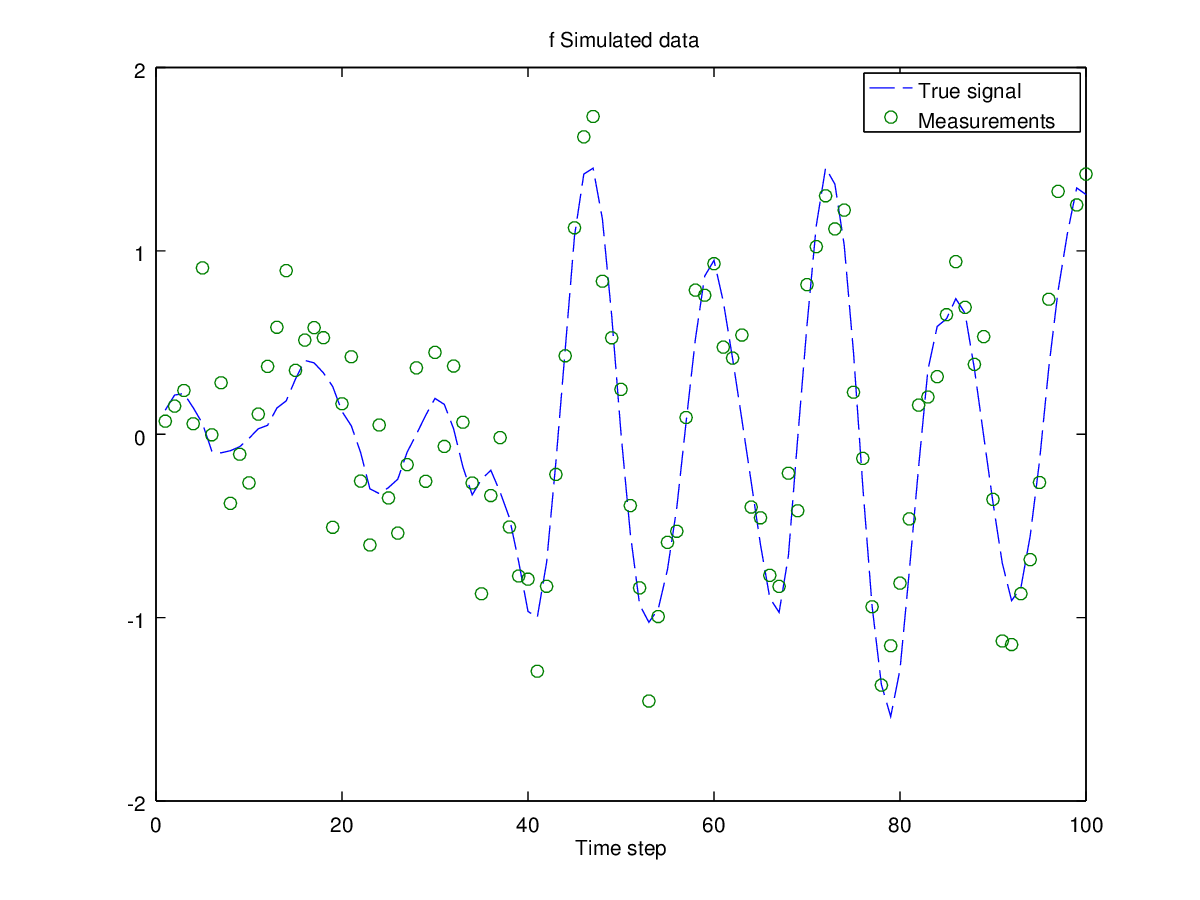

In [7]:
Image(filename='R2_SimulationData.png', width=700) 

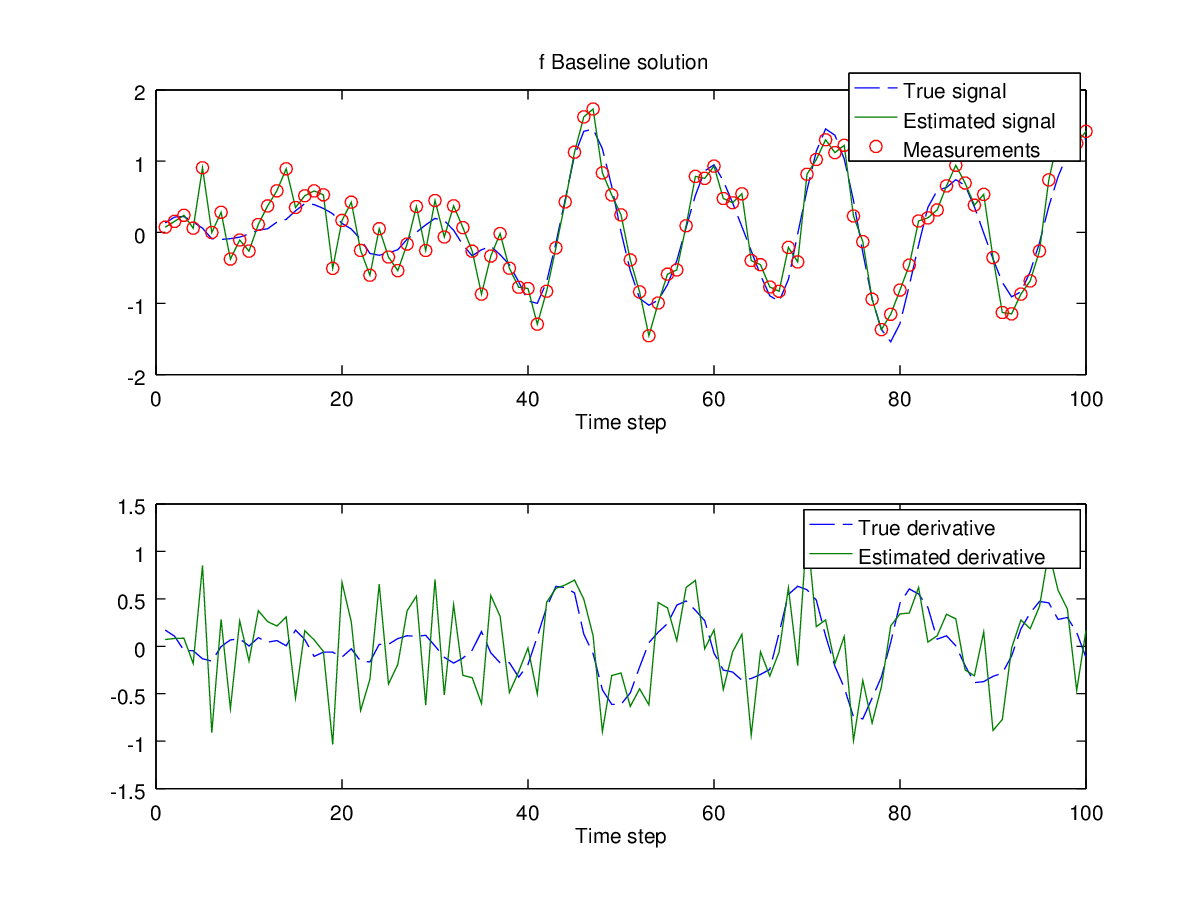

In [6]:
Image(filename='R2_BaseLine.png', width=700) 

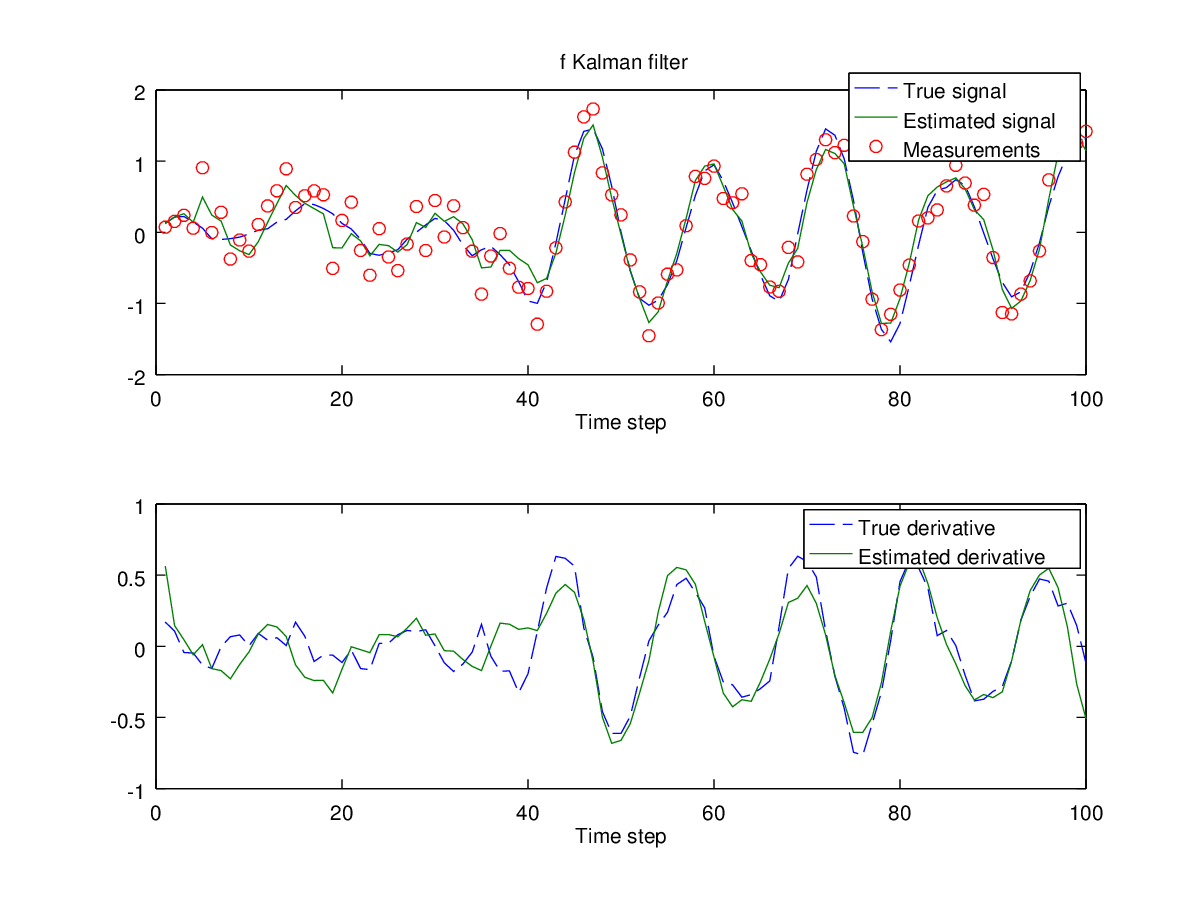

In [8]:
Image(filename='R2_KalmanFilter.png', width=700) 

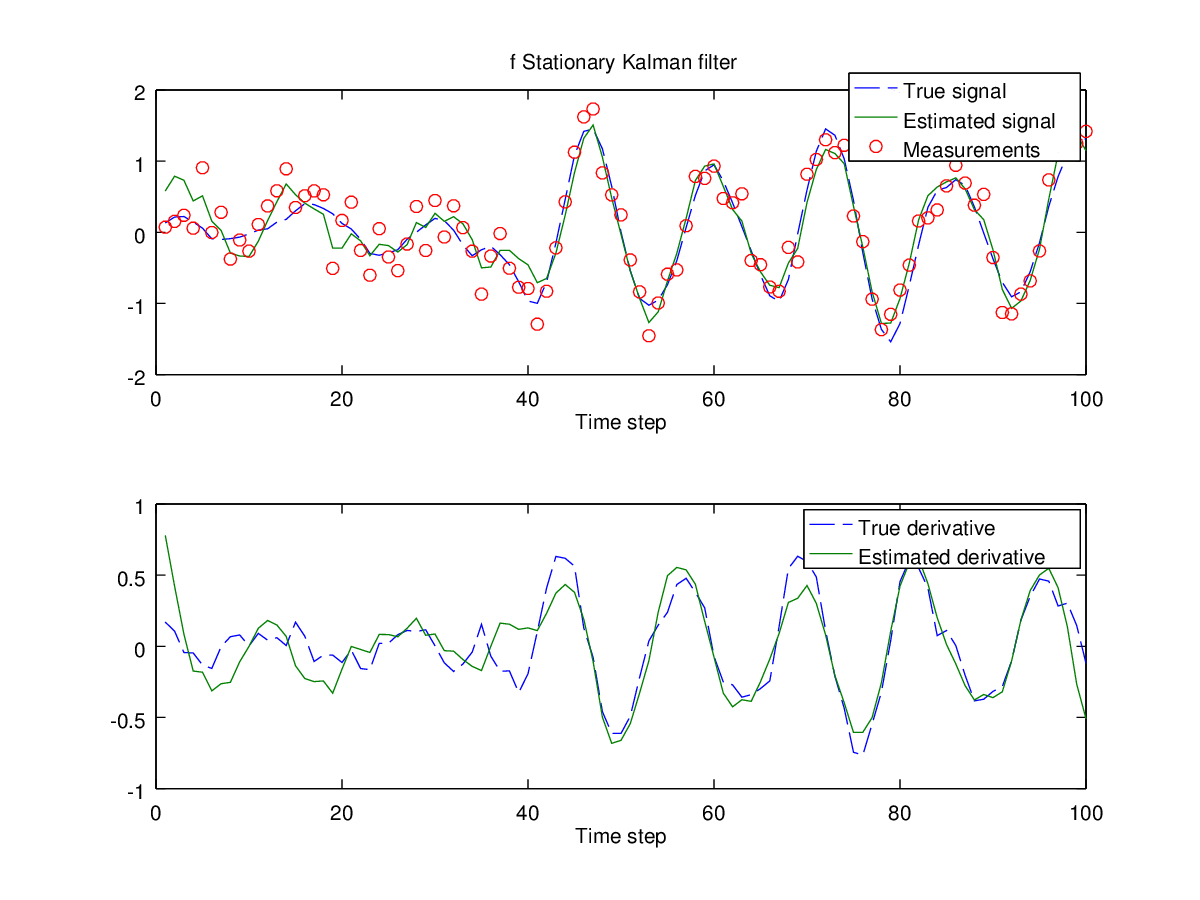

In [9]:
Image(filename='R2_StationaryKalmanFilter.png', width=700) 

### 2.

The stationary Kalman gain numerically computed was:

$$
K =
\begin{bmatrix}
    0.42498 \\
    0.11114
\end{bmatrix}
$$

The RMSE for the stationary Kalman Filter was $7.6433$ which is much better than the baseline solution RMSE ($23.527$) and slightly higher than the Kalman filter RMSE ($6.2974$).

Comparing the Kalman filter and it stationary version it can be stated that there is not practical difference once the Kalman gain matrix has reached the stationary state (i.e. it becomes constant). The subtle performance differences between the stationary and non-stationary version occur while the Kalman is getting close the stationary state. For this particular exercise example it does not take so long for the Kalman gain to become stationary, that is why the performance difference is small.